In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *
from ppp_aging.model import generate_states_cols

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")

1.3_metabolism_CVD_prediction.ipynb

## 比较不同方法对不同心血管事件的预测效果（FIG1）


In [2]:
output_dir = "result/part1/3_CVD_prediction/model"

results = []
from collections import defaultdict

model_dict = defaultdict(dict)
for pkl_file in Path(output_dir).rglob("*.pkl"):
    method_name = pkl_file.stem
    disease_name = pkl_file.parent.name
    obj = pd.read_pickle(pkl_file)

    test_metrics = obj["test_metrics"]
    test_metrics_series = pd.Series(test_metrics)
    test_metrics_series["method"] = method_name
    test_metrics_series["disease"] = disease_name
    results.append(test_metrics_series)
    model_dict[disease_name][method_name] = obj["model"]
res_df = pd.concat(results, axis=1).T
res_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,method,disease
0,0.72894,0.766564,0.692551,0.731497,0.738043,0.724303,0.447879,0.453405,0.441999,0.626374,0.701038,0.556062,0.732752,0.739982,0.725117,0.032415,0.039248,0.022223,RF,Stroke
1,0.774629,0.807282,0.741264,0.672628,0.68034,0.665497,0.428339,0.433392,0.423098,0.802198,0.859973,0.743685,0.671082,0.678426,0.663457,0.037922,0.046475,0.026459,proteomics,Stroke
2,0.642544,0.683861,0.604848,0.511212,0.519705,0.503368,0.353447,0.35835,0.348956,0.730769,0.794915,0.670828,0.508591,0.516297,0.501175,0.01887,0.022739,0.014362,AS,Stroke
3,0.719282,0.7566,0.686921,0.753694,0.760044,0.747214,0.455635,0.461361,0.449724,0.582418,0.656266,0.512423,0.755738,0.763185,0.748759,0.028993,0.035396,0.020229,RF_without_AS,Stroke
4,0.765332,0.790674,0.740756,0.716461,0.723526,0.709264,0.464957,0.471766,0.458649,0.689855,0.738147,0.642308,0.71707,0.724337,0.709655,0.071201,0.084564,0.054205,RF,Peripheral_vascular_disease
5,0.823035,0.845407,0.801775,0.853486,0.858478,0.847523,0.541617,0.551295,0.531391,0.64058,0.69362,0.590138,0.858355,0.864316,0.853338,0.144026,0.173399,0.110925,proteomics,Peripheral_vascular_disease
6,0.716618,0.743713,0.689962,0.648283,0.655606,0.641089,0.43115,0.437187,0.425415,0.681159,0.732069,0.633696,0.647531,0.655181,0.640509,0.053131,0.063004,0.041318,AS,Peripheral_vascular_disease
7,0.734139,0.759149,0.706268,0.66874,0.676128,0.661415,0.441779,0.447349,0.435671,0.695652,0.747592,0.646066,0.668125,0.674656,0.660835,0.060498,0.071325,0.047422,RF_without_AS,Peripheral_vascular_disease
8,0.754045,0.76916,0.738288,0.748931,0.756191,0.742513,0.53132,0.539825,0.522708,0.62545,0.660591,0.59258,0.755977,0.76304,0.749214,0.151666,0.168359,0.132088,RF,incident_cad
9,0.781632,0.797953,0.766256,0.695114,0.702566,0.68818,0.509255,0.516797,0.501956,0.738295,0.768729,0.709576,0.69265,0.69981,0.685039,0.210573,0.235718,0.183339,proteomics,incident_cad


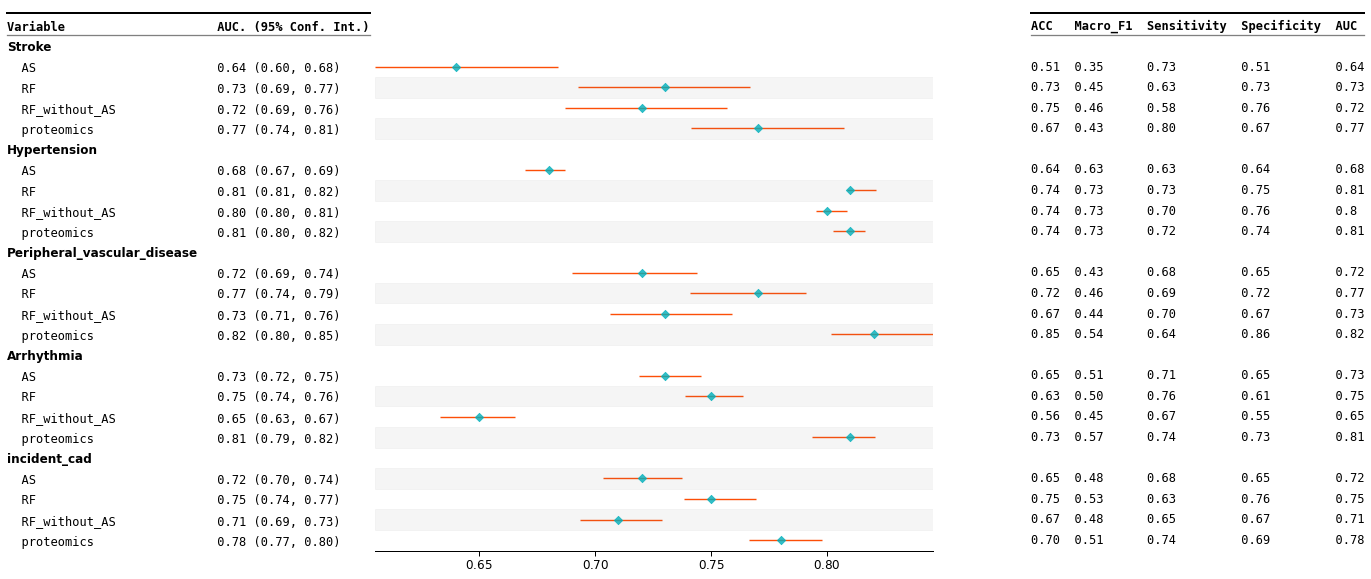

In [3]:
# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import forestplot as fp

fig, ax = plt.subplots(figsize=(10, 10))
plt_df = res_df.copy()
cols = ["ACC", "Macro_F1", "Sensitivity", "Specificity", "AUC"]
for col in cols:
    plt_df[col] = plt_df[col].apply(lambda x: f"{x:.2f}")

plt_df["AUC. (95% Conf. Int.)"] = (
    plt_df["AUC"].astype(float).apply(lambda x: f"{x:.2f}")
    + " ("
    + plt_df["AUC_LCI"].astype(float).apply(lambda x: f"{x:.2f}")
    + ", "
    + plt_df["AUC_UCI"].astype(float).apply(lambda x: f"{x:.2f}")
    + ")"
)


fp.forestplot(
    plt_df.sort_values("method"),
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="method",
    # capitalize="capitalize",  # Capitalize labels
    groupvar="disease",
    table=True,  # Format as a table
    sort=False,
    annote=["AUC. (95% Conf. Int.)"],
    annoteheaders=["AUC. (95% Conf. Int.)"],
    rightannote=cols,
    right_annoteheaders=cols,
    ax=ax,
    color_alt_rows=True,  # Gray alternate rows
    **{
        "marker": "D",  # set maker symbol as diamond
        "markersize": 35,  # adjust marker size,
        "markercolor": "#00AFBB",
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": "#FC4E07",  # gray color for x-reference line
        "xtick_size": 12,  # adjust x-ticker fontsize
        "linecolor": "#FC4E07",
    },
)
fig.savefig(
    "result/part1/3_CVD_prediction/forestplot.svg", dpi=400, bbox_inches="tight"
)
fig.savefig(
    "result/part1/3_CVD_prediction/forestplot.png", dpi=400, bbox_inches="tight"
)

## 可视化模型权重

In [4]:
import json, pandas

combination_dict_dir = "result/part1/3_CVD_prediction/json"
combination_dict = defaultdict(dict)
for i in Path(combination_dict_dir).rglob("*.json"):
    current_json = json.load(open(i))
    disease = i.stem

    for method, method_json in current_json.items():
        combination_dict[disease][method] = method_json["features"]


combination_dict

defaultdict(dict,
            {'Peripheral_vascular_disease': {'RF': ['age',
               'sex',
               'ldl_a',
               'hdl_a',
               'tc_a',
               'tg_a',
               'sbp_a',
               'BMI',
               'smoking',
               'prevalent_diabetes'],
              'RF_without_AS': ['hdl_a',
               'ldl_a',
               'sbp_a',
               'tc_a',
               'tg_a',
               'smoking',
               'BMI',
               'prevalent_diabetes'],
              'AS': ['age', 'sex'],
              'proteomics': ['C3',
               'KLK7',
               'GCHFR',
               'NHLRC3',
               'APOD',
               'GAPDH',
               'TP53I3',
               'CPA4',
               'ANXA2',
               'GRSF1',
               'IL25',
               'HMMR',
               'MRPL52',
               'PAIP2B',
               'THAP12',
               'FOS',
               'FGF9',
               'PITHD1',

In [5]:
def save_fig(fig=None, path=None, bbox_inches="tight", dpi=400, **kwargs):
    if path is None:
        path = "temp"
    if fig is None:
        fig = plt.gcf()
    Path(path).parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(f"{path}.png", dpi=400, **kwargs)
    fig.savefig(f"{path}.pdf", dpi=400, **kwargs)
    fig.savefig(f"{path}.svg", dpi=400, **kwargs)
    plt.close(fig)


figsave_path = "result/part1/3_CVD_prediction/weights_viz"
Path(figsave_path).mkdir(parents=True, exist_ok=True)

Peripheral_vascular_disease Have 30 features
Arrhythmia Have 129 features
Stroke Have 14 features
Hypertension Have 437 features
incident_cad Have 83 features


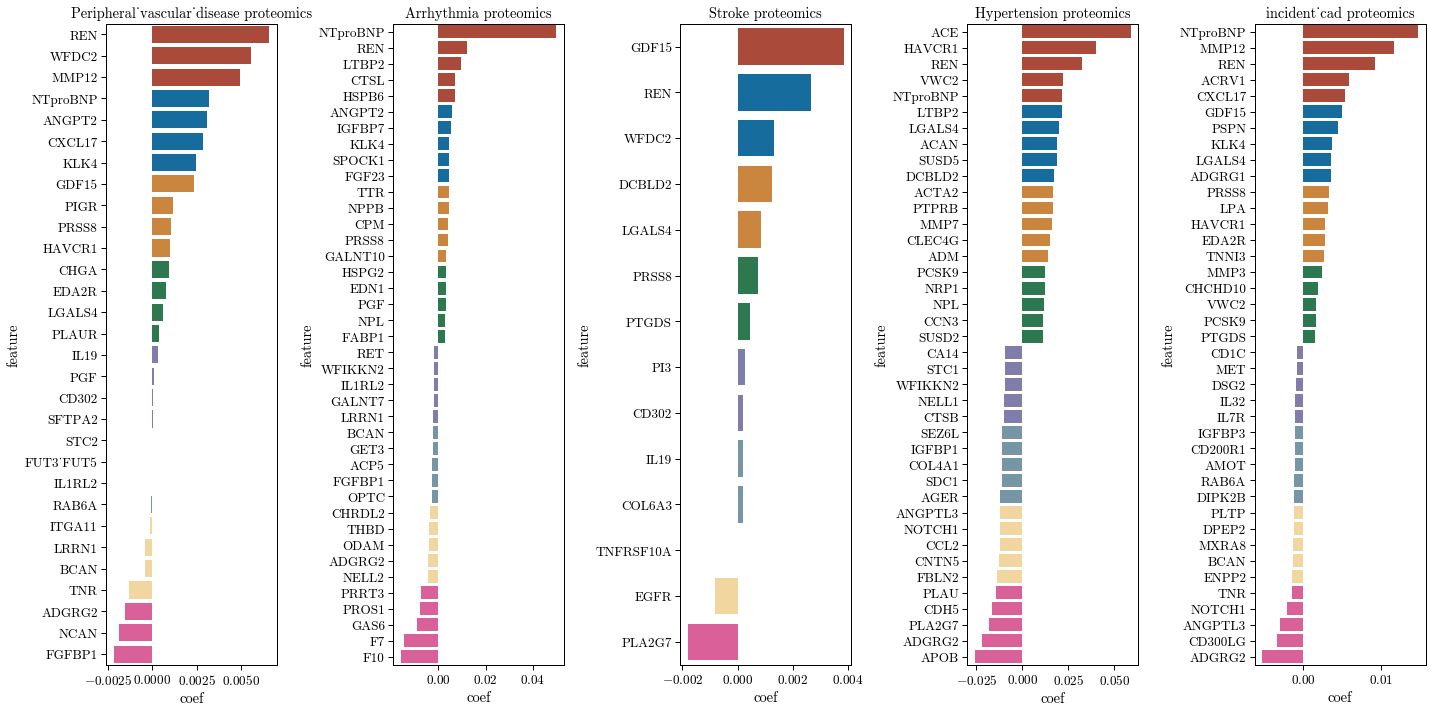

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes = axes.flatten()
idx = -1
for disease in combination_dict.keys():
    for current_method in combination_dict[disease].keys():
        if current_method != "proteomics":

            continue
        else:
            idx += 1
        ax = axes[idx]

        coef_name_list = combination_dict[disease][current_method]
        coef_weight = model_dict[disease][current_method]["model"].coef_
        coef_weight_name_df = pd.DataFrame(
            {"coef": coef_weight, "feature": coef_name_list}
        )

        coef_weight_name_df = coef_weight_name_df[
            coef_weight_name_df["coef"] != 0
        ]  # only show non-zero coef features
        print(f"{disease} Have {coef_weight_name_df.shape[0]} features")
        coef_weight_name_df = coef_weight_name_df.sort_values("coef", ascending=False)

        if current_method == "proteomics":
            coef_weight_name_df = pd.concat(
                [coef_weight_name_df.head(20), coef_weight_name_df.tail(20)]
            )

        sns.barplot(
            data=coef_weight_name_df, x="coef", y="feature", ax=ax, palette="nejm"
        )
        ax.set_title(f"{disease} {current_method}")
        fig.tight_layout()

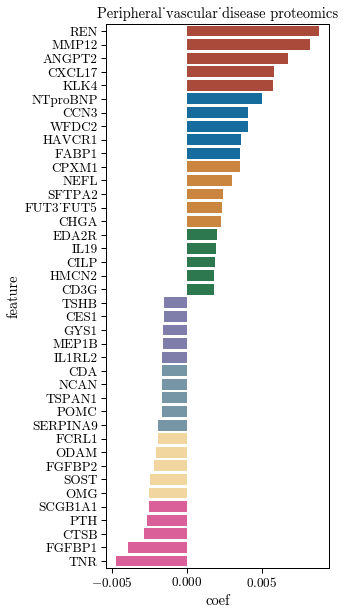

In [32]:
for disease in combination_dict.keys():
    for current_method in combination_dict[disease].keys():
        if current_method != "proteomics":
            continue

        coef_name_list = combination_dict[disease][current_method]
        coef_weight = model_dict[disease][current_method].coef_
        coef_weight_name_df = pd.DataFrame(
            {"coef": coef_weight, "feature": coef_name_list}
        )

        coef_weight_name_df = coef_weight_name_df[
            coef_weight_name_df["coef"] != 0
        ]  # only show non-zero coef features
        coef_weight_name_df = coef_weight_name_df.sort_values("coef", ascending=False)

        if current_method == "proteomics":
            coef_weight_name_df = pd.concat(
                [coef_weight_name_df.head(20), coef_weight_name_df.tail(20)]
            )

        fig, ax = plt.subplots(figsize=(4, 10))
        sns.barplot(
            data=coef_weight_name_df, x="coef", y="feature", ax=ax, palette="nejm"
        )
        ax.set_title(f"{disease} {current_method}")
        break
    break

In [25]:
coef_weight_name_df[coef_weight_name_df["coef"] != 0]

,coef,feature
2338,0.008817,REN
2466,0.008209,MMP12
2714,0.006740,ANGPT2
2830,0.005775,CXCL17
2716,0.005704,KLK4
...,...,...
2480,-0.002570,SCGB1A1
508,-0.002713,PTH
2468,-0.002896,CTSB
2558,-0.003978,FGFBP1
